In [56]:
import cirq
import numpy as np

In [57]:
from typing import *
def get_Hamiltonian(N: int, 
                    indices: List[Tuple[int,int]], 
                    angles: Union[List[float], np.ndarray[float]]) -> np.ndarray:
    if len(indices) != len(angles):
        raise ValueError('The length of indices and angles must match..')
    q = [cirq.NamedQubit(name=f'q_{i}') for i in range(N)]
    H = sum([angles[i]*(cirq.X(q[indices[i][0]])*cirq.X(q[indices[i][1]])+cirq.Y(q[indices[i][0]])*cirq.Y(q[indices[i][1]])) for i in range(len(angles))])
    return H.matrix()

N = 10
indices = [(i,i+1) for i in range(N-1)]
angles = np.random.uniform(-2*np.pi,2*np.pi, len(indices))
H = get_Hamiltonian(N=N,
                indices=indices,
                angles=angles)

In [58]:
NN_sparsities = []
N_vals = list(range(3,10+2))
for N in N_vals:
    indices = [(i,i+1) for i in range(N-1)]
    angles = np.random.uniform(-2*np.pi,2*np.pi, len(indices))
    H = get_Hamiltonian(N=N,
                    indices=indices,
                    angles=angles)
    U = expm(-1j*H)
    sparsity = np.count_nonzero(U)/U.size
    NN_sparsities.append(sparsity)

In [59]:
Ring_sparsities = []
for N in N_vals:
    indices = [(i,i+1) for i in range(N-1)]+[(0,N-1)]
    angles = np.random.uniform(-2*np.pi,2*np.pi, len(indices))
    H = get_Hamiltonian(N=N,
                    indices=indices,
                    angles=angles)
    U = expm(-1j*H)
    sparsity = np.count_nonzero(U)/U.size
    Ring_sparsities.append(sparsity)

In [60]:
NNN_sparsities = []
for N in N_vals:
    indices = [(i,i+1) for i in range(N-1)]+[(i,i+2) for i in range(N-2)]
    angles = np.random.uniform(-2*np.pi,2*np.pi, len(indices))
    H = get_Hamiltonian(N=N,
                    indices=indices,
                    angles=angles)
    U = expm(-1j*H)
    sparsity = np.count_nonzero(U)/U.size
    NNN_sparsities.append(sparsity)

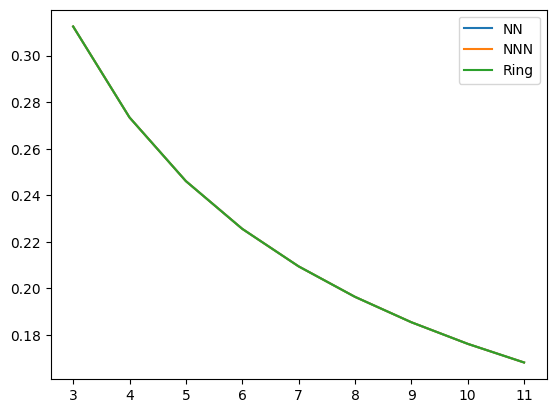

In [61]:
import matplotlib.pyplot as plt
plt.plot(N_vals, NN_sparsities, label='NN')
plt.plot(N_vals, NNN_sparsities, label='NNN')
plt.plot(N_vals, Ring_sparsities, label='Ring')
plt.legend()

In [148]:
import numpy as np
from time import time
from scipy.sparse import csc_matrix

def c1(Q, w):
    return np.dot(w, np.dot(Q, w))

def c2(Q, w):
    return w.T@(Q@w)

def c3(Q, w):
    return np.matmul(w,np.matmul(Q,w))

N_min, N_max = 2, 25
N_vals = [N_min + i for i in range(N_max-1)]

c1_res = {N:[] for N in N_vals}
c2_res = {N:[] for N in N_vals}
c3_res = {N:[] for N in N_vals}


seeds = 10000
for s in range(seeds):
    for N in N_vals:
        k = N // 2
        w = np.zeros(N).astype(np.float32)
        w[np.random.choice(N, k, replace=False)]=1
        w.reshape((N,1))
        _ = np.random.rand(N, N)
        Q = (_ + _.T) / 2
        Q = Q.astype(np.float32)
        
        
        start = time()
        c_1 = c1(Q,w)
        stop = time()
        c1_res[N].append(stop-start)
        
        start = time()
        c_2 = c2(Q,w)
        stop = time()
        c2_res[N].append(stop-start)

        start = time()
        c_3 = c3(Q,w)
        stop = time()
        c3_res[N].append(stop-start)
        

        
for N in N_vals:
    c1_res[N] = np.mean(c1_res[N])
    c2_res[N] = np.mean(c2_res[N])
    c3_res[N] = np.mean(c3_res[N])
        

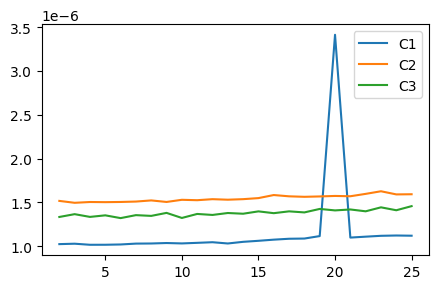

In [147]:
fig, ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(N_vals, [c1_res[N] for N in N_vals], label='C1')
ax.plot(N_vals, [c2_res[N] for N in N_vals], label='C2')
ax.plot(N_vals, [c3_res[N] for N in N_vals], label='C3')
ax.legend()
